In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from tqdm import tqdm

!pip install pandas_profiling 
!pip install ipywidgets
from pandas_profiling import ProfileReport

In [52]:
df_A=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_A.csv')
df_B=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_B.csv')

# Base de données clients 

## On commence par constituer la base de clients sur le df_A 

In [53]:
df_base_client1 = df_A[['sender_first_name','sender_last_name','sender_birth_date']].copy()
df_base_client2 = df_A[['receiver_first_name','receiver_last_name','receiver_birth_date']].copy()

df_base_client1.head(3)

df_base_client1.drop_duplicates(keep = 'first', inplace=True)
df_base_client2.drop_duplicates(keep = 'first', inplace=True)

df_base_client1.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date'},
                       inplace=True)
df_base_client2.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date'},
                       inplace=True)

df_base_client1.sort_values(by=['First_name', 'Last_name'],inplace=True)
df_base_client2.sort_values(by=['First_name', 'Last_name'],inplace=True)

df_base_client= pd.concat([df_base_client1,df_base_client2])
df_base_client.drop_duplicates(keep = 'first', inplace=True)
#df_base_client.head(3)

df_gpb =pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'count': 'nb_tx_sent_A', 'mean': 'tx_sent_mean_A',
                        'median': 'tx_sent_med_A','var': 'variance_tx_sent_A'}, inplace=True)

df_alert =pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'sum': 'nb_tx_sent_alert_solo_A'}, inplace=True)

df_base_client1.reset_index(inplace=True)
df_base_client1 = df_base_client1.drop(['index'], axis=1, inplace = False)

df_base_client1_bis = pd.merge(df_base_client1,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client1_ter = pd.merge(df_base_client1_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

df_gpb =pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'count': 'nb_tx_received_A', 'mean': 'tx_received_mean_A',
                        'median': 'tx_received_med_A', 'var': 'variance_tx_received_A'}, inplace=True)

df_alert =pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'sum': 'nb_tx_received_alert_solo_A'}, inplace=True)

df_base_client2.reset_index(inplace=True)
df_base_client2 = df_base_client2.drop(['index'], axis=1, inplace = False)

df_base_client2_bis = pd.merge(df_base_client2,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client2_ter = pd.merge(df_base_client2_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

DF_base_clients_A = pd.merge(df_base_client1_ter,df_base_client2_ter, on=['First_name','Last_name','birth_date'], how='outer')

DF_base_clients_A['nb_tx_all_A']=DF_base_clients_A.nb_tx_sent_A + DF_base_clients_A.nb_tx_received_A
DF_base_clients_A['nb_tx_alert_solo_all_A']=DF_base_clients_A.nb_tx_sent_alert_solo_A + DF_base_clients_A.nb_tx_received_alert_solo_A
#Métrique de confiance de l'individu
DF_base_clients_A['reliability_receiver_A']= 1- DF_base_clients_A['nb_tx_received_alert_solo_A']/DF_base_clients_A['nb_tx_received_A']
DF_base_clients_A['reliability_sent_A']= 1- DF_base_clients_A['nb_tx_sent_alert_solo_A']/DF_base_clients_A['nb_tx_sent_A']
DF_base_clients_A['reliability_all_A']= 1- DF_base_clients_A['nb_tx_alert_solo_all_A']/DF_base_clients_A['nb_tx_all_A']
DF_base_clients_A

,First_name,Last_name,birth_date,timestamp,nb_tx_sent_A,tx_sent_mean_A,tx_sent_med_A,variance_tx_sent_A,nb_tx_sent_alert_solo_A,nb_tx_received_A,tx_received_mean_A,tx_received_med_A,variance_tx_received_A,nb_tx_received_alert_solo_A,nb_tx_all_A,nb_tx_alert_solo_all_A,reliability_receiver_A,reliability_sent_A,reliability_all_A
0,Aaron,Behrmann,1955-07-05,2018-04-07,1.0,586.61,586.61,NaN,5.0,256.0,186025.834336,417.05,3.260005e+12,0.0,257.0,5.0,1.0,-4.0,0.980545
1,Aaron,Behrmann,1955-07-05,2018-04-14,1.0,586.61,586.61,NaN,5.0,256.0,186025.834336,417.05,3.260005e+12,0.0,257.0,5.0,1.0,-4.0,0.980545
2,Aaron,Behrmann,1955-07-05,2018-04-21,1.0,586.61,586.61,NaN,5.0,256.0,186025.834336,417.05,3.260005e+12,0.0,257.0,5.0,1.0,-4.0,0.980545
3,Aaron,Behrmann,1955-07-05,2018-04-28,1.0,586.61,586.61,NaN,5.0,256.0,186025.834336,417.05,3.260005e+12,0.0,257.0,5.0,1.0,-4.0,0.980545
4,Aaron,Behrmann,1955-07-05,2018-05-05,1.0,586.61,586.61,NaN,5.0,256.0,186025.834336,417.05,3.260005e+12,0.0,257.0,5.0,1.0,-4.0,0.980545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374411,William,Tucker,1925-10-31,NaN,NaN,NaN,NaN,NaN,NaN,44.0,327734.518182,164.07,2.469403e+12,0.0,NaN,NaN,1.0,NaN,NaN
374412,Willis,Saunders,1945-09-06,NaN,NaN,NaN,NaN,NaN,NaN,188.0,496.303936,535.53,1.922591e+04,0.0,NaN,NaN,1.0,NaN,NaN
374413,Ying,Blackmon,1987-02-28,NaN,NaN,NaN,NaN,NaN,NaN,19.0,134.970000,134.97,0.000000e+00,0.0,NaN,NaN,1.0,NaN,NaN
374414,Yvonne,Howard,1939-07-16,NaN,NaN,NaN,NaN,NaN,NaN,55.0,112.908182,147.66,4.009877e+03,0.0,NaN,NaN,1.0,NaN,NaN


## On fait la même chose pour B 

In [54]:
"On fait la même chose pour df_B"

df_base_client1 = df_B[['sender_first_name','sender_last_name','sender_birth_date']].copy()
df_base_client2 = df_B[['receiver_first_name','receiver_last_name','receiver_birth_date']].copy()

df_base_client1.head(3)

df_base_client1.drop_duplicates(keep = 'first', inplace=True)
df_base_client2.drop_duplicates(keep = 'first', inplace=True)

df_base_client1.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date'},
                       inplace=True)
df_base_client2.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date'},
                       inplace=True)

df_base_client1.sort_values(by=['First_name', 'Last_name'],inplace=True)
df_base_client2.sort_values(by=['First_name', 'Last_name'],inplace=True)

df_base_client= pd.concat([df_base_client1,df_base_client2])
df_base_client.drop_duplicates(keep = 'first', inplace=True)

df_gpb =pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'count': 'nb_tx_sent_B', 'mean': 'tx_sent_mean_B',
                        'median': 'tx_sent_med_B', 'var': 'variance_tx_sent_B'}, inplace=True)

df_alert =pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date',
                        'sum': 'nb_tx_sent_alert_solo_B'}, inplace=True)

df_base_client1.reset_index(inplace=True)
df_base_client1 = df_base_client1.drop(['index'], axis=1, inplace = False)

df_base_client1_bis = pd.merge(df_base_client1,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client1_ter = pd.merge(df_base_client1_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

df_gpb =pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['tx_amount'].agg(['count','mean', 'median','var']))
df_gpb.reset_index(inplace=True)
df_gpb.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'count': 'nb_tx_received_B', 'mean': 'tx_received_mean_B',
                        'median': 'tx_received_med_B', 'var': 'variance_tx_received_B'}, inplace=True)

df_alert =pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'])['is_alert_solo'].agg(['sum']))
df_alert.reset_index(inplace=True)
df_alert.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',
                        'sum': 'nb_tx_received_alert_solo_B'}, inplace=True)

df_base_client2.reset_index(inplace=True)
df_base_client2 = df_base_client2.drop(['index'], axis=1, inplace = False)

df_base_client2_bis = pd.merge(df_base_client2,df_gpb ,on=['First_name','Last_name','birth_date'] )
df_base_client2_ter = pd.merge(df_base_client2_bis,df_alert ,on=['First_name','Last_name','birth_date'] )

DF_base_clients_B = pd.merge(df_base_client1_ter,df_base_client2_ter, on=['First_name','Last_name','birth_date'], how='outer')

DF_base_clients_B['nb_tx_all_B']=DF_base_clients_B.nb_tx_sent_B + DF_base_clients_B.nb_tx_received_B
DF_base_clients_B['nb_tx_alert_solo_all_B']=DF_base_clients_B.nb_tx_sent_alert_solo_B + DF_base_clients_B.nb_tx_received_alert_solo_B
#Métrique de confiance de l'individu
DF_base_clients_B['reliability_receiver_B']= 1- DF_base_clients_B['nb_tx_received_alert_solo_B']/DF_base_clients_B['nb_tx_received_B']
DF_base_clients_B['reliability_sent_B']= 1- DF_base_clients_B['nb_tx_sent_alert_solo_B']/DF_base_clients_B['nb_tx_sent_B']
DF_base_clients_B['reliability_all_B']= 1- DF_base_clients_B['nb_tx_alert_solo_all_B']/DF_base_clients_B['nb_tx_all_B']
DF_base_clients_B

,First_name,Last_name,birth_date,nb_tx_sent_B,tx_sent_mean_B,tx_sent_med_B,variance_tx_sent_B,nb_tx_sent_alert_solo_B,nb_tx_received_B,tx_received_mean_B,tx_received_med_B,variance_tx_received_B,nb_tx_received_alert_solo_B,nb_tx_all_B,nb_tx_alert_solo_all_B,reliability_receiver_B,reliability_sent_B,reliability_all_B
0,Aaron,Coatney,1957-11-29,174.0,1.833900e+02,183.390,0.000000e+00,1.0,86.0,3.359641e+05,36.35,5.957497e+12,0.0,260.0,1.0,1.0,0.994253,0.996154
1,Aaron,Gaskin,1942-04-25,6.0,1.233644e+06,71893.455,3.420208e+12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
2,Aaron,Grubb,1962-02-23,20.0,1.276800e+02,127.680,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
3,Aaron,Martinez,1941-05-16,169.0,4.959500e+02,495.950,0.000000e+00,0.0,24.0,1.904959e+06,143.66,2.991695e+13,0.0,193.0,0.0,1.0,1.000000,1.000000
4,Aaron,Rash,1967-03-21,15.0,1.783502e+06,213834.570,1.352206e+13,0.0,64.0,3.588018e+05,19.05,2.782158e+12,0.0,79.0,0.0,1.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,Yuk,Kliebert,1945-12-20,NaN,NaN,NaN,NaN,NaN,16.0,9.742463e+02,16.04,1.469055e+07,0.0,NaN,NaN,1.0,NaN,NaN
8757,Yvonne,Crawford,1973-04-16,NaN,NaN,NaN,NaN,NaN,4.0,9.682648e+06,8565027.81,1.130437e+14,0.0,NaN,NaN,1.0,NaN,NaN
8758,Yvonne,Westley,1941-04-15,NaN,NaN,NaN,NaN,NaN,57.0,1.255012e+02,174.49,6.296854e+03,0.0,NaN,NaN,1.0,NaN,NaN
8759,Zonia,Bucci,1955-11-23,NaN,NaN,NaN,NaN,NaN,19.0,1.602500e+02,160.25,0.000000e+00,0.0,NaN,NaN,1.0,NaN,NaN


## Base clients pooling (sans infos sur les tx)

In [55]:
df_A.columns

Index(['tx_id', 'sender_account_id', 'receiver_account_id', 'tx_amount',
       'timestamp', 'tx_type', 'sender_bank_id', 'sender_first_name',
       'sender_last_name', 'sender_country_code', 'sender_birth_date',
       'sender_zip_code', 'receiver_bank_id', 'receiver_first_name',
       'receiver_last_name', 'receiver_country_code', 'receiver_birth_date',
       'receiver_zip_code', 'is_alert_solo', 'is_alert_pooled'],
      dtype='object')

In [56]:
df_base_client1 = df_A[['sender_first_name','sender_last_name','sender_birth_date',
                       'sender_account_id', 'sender_bank_id','sender_country_code',
                       'sender_zip_code']].copy()

df_base_client2 = df_A[['receiver_first_name','receiver_last_name','receiver_birth_date', 
                        'receiver_account_id', 'receiver_bank_id','receiver_country_code',
                       'receiver_zip_code']].copy()

df_base_client1.head(3)

df_base_client1.drop_duplicates(keep = 'first', inplace=True)
df_base_client2.drop_duplicates(keep = 'first', inplace=True)

df_base_client1.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date', ' sender_account_id' : 'account_id',
                                  'sender_bank_id': 'bank_id','sender_country_code': 'country_code',
                                  'sender_zip_code': 'zip_code'},
                       inplace=True)

df_base_client2.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',' receiver_account_id' : 'account_id',
                                  'receiver_bank_id': 'bank_id','receiver_country_code': 'country_code',
                                  'receiver_zip_code': 'zip_code'},
                       inplace=True)

df_base_client1.sort_values(by=['First_name', 'Last_name'],inplace=True)
df_base_client2.sort_values(by=['First_name', 'Last_name'],inplace=True)

df_base_client_A= pd.concat([df_base_client1,df_base_client2])
df_base_client_A.drop_duplicates(keep = 'first', inplace=True)
df_base_client_A

,First_name,Last_name,birth_date,sender_account_id,bank_id,country_code,zip_code,receiver_account_id
17672,Aaron,Behrmann,1955-07-05,6540.0,A,FR,40160,NaN
8665,Aaron,Coatney,1957-11-29,NaN,B,FR,60240,NaN
887,Aaron,Davis,1947-09-15,NaN,C,FR,46240,NaN
4389,Aaron,Gaskin,1942-04-25,2260.0,A,FR,71390,NaN
36813,Aaron,Lykins,1964-11-06,1961.0,A,FR,77540,NaN
...,...,...,...,...,...,...,...,...
7530,Yvonne,Seip,1976-02-10,NaN,A,FR,80540,3513.0
917,Zachary,Kawai,1929-05-30,NaN,A,FR,63450,753.0
17319,Zonia,Bucci,1955-11-23,NaN,C,SL,61110,NaN
6164,Zora,King,1934-09-30,NaN,A,FR,67250,5412.0


In [57]:
df_base_client1 = df_B[['sender_first_name','sender_last_name','sender_birth_date',
                       'sender_account_id', 'sender_bank_id','sender_country_code',
                       'sender_zip_code']].copy()

df_base_client2 = df_B[['receiver_first_name','receiver_last_name','receiver_birth_date', 
                        'receiver_account_id', 'receiver_bank_id','receiver_country_code',
                       'receiver_zip_code']].copy()

df_base_client1.drop_duplicates(keep = 'first', inplace=True)
df_base_client2.drop_duplicates(keep = 'first', inplace=True)

df_base_client1.rename(columns = {'sender_first_name': 'First_name', 'sender_last_name': 'Last_name',
                                 'sender_birth_date' : 'birth_date', ' sender_account_id' : 'account_id',
                                  'sender_bank_id': 'bank_id','sender_country_code': 'country_code',
                                  'sender_zip_code': 'zip_code'},
                       inplace=True)

df_base_client2.rename(columns = {'receiver_first_name': 'First_name', 'receiver_last_name': 'Last_name',
                                 'receiver_birth_date' : 'birth_date',' receiver_account_id' : 'account_id',
                                  'receiver_bank_id': 'bank_id','receiver_country_code': 'country_code',
                                  'receiver_zip_code': 'zip_code'},
                       inplace=True)

df_base_client1.sort_values(by=['First_name', 'Last_name'],inplace=True)
df_base_client2.sort_values(by=['First_name', 'Last_name'],inplace=True)

df_base_client_B= pd.concat([df_base_client1,df_base_client2])
df_base_client_B.drop_duplicates(keep = 'first', inplace=True)
df_base_client_B

,First_name,Last_name,birth_date,sender_account_id,bank_id,country_code,zip_code,receiver_account_id
3564,Aaron,Coatney,1957-11-29,5655.0,B,FR,60240,NaN
27599,Aaron,Gaskin,1942-04-25,NaN,A,FR,71390,NaN
13641,Aaron,Grubb,1962-02-23,NaN,C,FR,77760,NaN
9443,Aaron,Martinez,1941-05-16,1504.0,B,FR,60130,NaN
22221,Aaron,Rash,1967-03-21,7204.0,B,FR,27930,NaN
...,...,...,...,...,...,...,...,...
588,Zachary,Haynes,1968-04-12,NaN,B,FR,56220,9294.0
3967,Zandra,Mays,1959-01-23,NaN,B,FR,51210,5045.0
712,Zoila,Guillory,1951-02-24,NaN,B,FR,46600,9565.0
13664,Zonia,Bucci,1955-11-23,NaN,C,SL,61110,NaN


# Objectif : éviter le data leakage donc on va prendre en compte que les variables du passé 

## On crée une base clients SENDER en ne prenant en compte que les tx passées

In [58]:
# On crée une base clients SENDER en ne prenant en compte que les tx passées 
#Pour cela, on va sort_values par sender 

df_test= df_A[['sender_first_name','sender_last_name','sender_birth_date','timestamp']].copy()
 
    
# ensuite, on groupby pour pouvoir faire des aggrégations 
# on choisit comme aggrégation : count, moyenne, mediane et variance

# On s'occupe du sender 
df= pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).count())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'count_cum_sender_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
   


df= pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).median())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'median_cum_sender_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).mean())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'mean_cum_sender_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).var())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'variance_cum_sender_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)


# On compte également le nombre de tx is_alert_solo
df= pd.DataFrame(df_A.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['is_alert_solo'].expanding(1).sum())
df =pd.DataFrame(df.reset_index()['is_alert_solo'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'is_alert_solo': 'nb_is_alert_solo_sender_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
df_BC_sender_A = df_test.copy()

### On fait la même chose pour le receiver

In [59]:
#On fait la même chose mais pour le receiver ! 

df_test= df_A[['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp']].copy()

df= pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).count())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'count_cum_receiver_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
   


df= pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).median())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'median_cum_receiver_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).mean())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'mean_cum_receiver_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).var())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'variance_cum_receiver_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)


# On compte également le nombre de tx is_alert_solo
df= pd.DataFrame(df_A.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['is_alert_solo'].expanding(1).sum())
df =pd.DataFrame(df.reset_index()['is_alert_solo'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'is_alert_solo': 'nb_is_alert_solo_receiver_A'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
df_BC_receiver_A = df_test.copy()

### On fait la même pour B 

In [60]:
df_test= df_B[['sender_first_name','sender_last_name','sender_birth_date','timestamp']].copy()
 
    
# ensuite, on groupby pour pouvoir faire des aggrégations 
# on choisit comme aggrégation : count, moyenne, mediane et variance

# On s'occupe du sender 
df= pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).count())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'count_cum_sender_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
   


df= pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).median())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'median_cum_sender_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).mean())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'mean_cum_sender_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['tx_amount'].expanding(1).var())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'variance_cum_sender_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)


# On compte également le nombre de tx is_alert_solo
df= pd.DataFrame(df_B.groupby(by=['sender_first_name','sender_last_name','sender_birth_date'], as_index=False)['is_alert_solo'].expanding(1).sum())
df =pd.DataFrame(df.reset_index()['is_alert_solo'])
df_test.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'is_alert_solo': 'nb_is_alert_solo_sender_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
df_BC_sender_B = df_test.copy()

In [61]:
#On fait la même chose mais pour le receiver ! 

df_test= df_B[['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp']].copy()

df= pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).count())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'count_cum_receiver_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
   


df= pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).median())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'median_cum_receiver_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).mean())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'mean_cum_receiver_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)

    
df= pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['tx_amount'].expanding(1).var())

df =pd.DataFrame(df.reset_index()['tx_amount'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'tx_amount': 'variance_cum_receiver_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)


# On compte également le nombre de tx is_alert_solo
df= pd.DataFrame(df_B.groupby(by=['receiver_first_name','receiver_last_name','receiver_birth_date'], as_index=False)['is_alert_solo'].expanding(1).sum())
df =pd.DataFrame(df.reset_index()['is_alert_solo'])
df_test.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)
df_test.reset_index(inplace=True) 
df_test.drop(['index'], axis=1, inplace=True)
df.rename(columns={'is_alert_solo': 'nb_is_alert_solo_receiver_B'},inplace=True)
df_test= pd.concat([df_test,df],axis=1)
df_BC_receiver_B = df_test.copy()

In [62]:
df_BC_receiver_B

,receiver_first_name,receiver_last_name,receiver_birth_date,timestamp,count_cum_receiver_B,median_cum_receiver_B,mean_cum_receiver_B,variance_cum_receiver_B,nb_is_alert_solo_receiver_B
0,Aaron,Behrmann,1955-07-05,2018-04-28,1.0,2047.420,2.047420e+03,NaN,0.0
1,Aaron,Behrmann,1955-07-05,2018-12-01,2.0,7543.215,7.543215e+03,6.040753e+07,0.0
2,Aaron,Behrmann,1955-07-05,2020-03-14,3.0,13039.010,2.187752e+05,1.338871e+11,0.0
3,Aaron,Behrmann,1955-07-05,2021-02-27,4.0,327139.095,1.853784e+06,1.078228e+13,0.0
4,Aaron,Behrmann,1955-07-05,2021-12-18,5.0,641239.180,5.777995e+06,8.508385e+13,0.0
...,...,...,...,...,...,...,...,...,...
458061,Zulma,Steffan,1945-02-10,2021-02-06,17.0,154.820,3.908947e+05,2.595521e+12,0.0
458062,Zulma,Steffan,1945-02-10,2021-03-27,18.0,154.820,3.691870e+05,2.451325e+12,0.0
458063,Zulma,Steffan,1945-02-10,2021-06-05,19.0,154.820,3.497642e+05,2.322308e+12,0.0
458064,Zulma,Steffan,1945-02-10,2021-08-14,20.0,154.820,3.322838e+05,2.206193e+12,0.0




# Enrichissement du dataset (par l'intermédiaire de la base de données clients) 

Dans un premier temps, on va réaliser la modélisation avec le df_merge grâce aux tx_id. 
Ensuite on fera exactement la même chose mais avec le df_merge grâce au pooling. 


In [63]:
df_A=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_A.csv')
df_B=pd.read_csv('/Users/Corentin/Desktop/statapp/transactions_B.csv')

## Question principale : que va apporter les informations de B à A ?

On analyse premièrement quelles informations supplémentaires obtient-on grâce aux 2 lignes. 
Pour cela, on récupère les tx_id présentes dans les 2 datasets et on regarde les 2 lignes correspondantes. 

In [64]:
# On accède à toutes les tx_id présentes dans les deux df
L1 = list(df_A['tx_id'].values) 
L2 = list(df_B['tx_id'].values)

L=np.isin(L1,L2).astype(int)*L1
L=L[L != 0]  #liste des transactions appartenant aux 2 datasets 

In [65]:
def analyse_de_tx(nb_tx):
    "permet de comparer deux lignes d'une même transaction"
    display(df_A[df_A['tx_id']==nb_tx])
    display(df_B[df_B['tx_id']==nb_tx])

In [66]:
analyse_de_tx(L[145667])

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,sender_birth_date,sender_zip_code,receiver_bank_id,receiver_first_name,receiver_last_name,receiver_country_code,receiver_birth_date,receiver_zip_code,is_alert_solo,is_alert_pooled
573954,905797,NaN,1822.0,511.05,2020-10-17,WIRE,B,Scott,Lawler,FR,1938-09-17,68740,A,Ambrose,Cole,FR,1958-04-07,3800,False,False


,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,sender_birth_date,sender_zip_code,receiver_bank_id,receiver_first_name,receiver_last_name,receiver_country_code,receiver_birth_date,receiver_zip_code,is_alert_solo,is_alert_pooled
314875,905797,4585.0,NaN,511.05,2020-10-17,WIRE,B,Scott,Lawler,FR,1938-09-17,68740,A,Ambrose,Cole,FR,1958-04-07,3800,False,False


Les 2 lignes sont équivalentes pour la plupart (totalité?) des transactions en commun. 
La seule différence est le sender_account_id ou le receiver_account_id qui n'ont pas réellement d'importance. 


#### ==> Une hypothèse que l'on peut formuler à ce stade est que la plus-value de merge les DF porte donc sur les clients ! 

## On va ajouter les informations clients (des deux bases de données A et B) au dataframe pour compléter notre dataset ! 

In [67]:
"On s'occupe du sender"
#On sort pour faciliter le merging 
df_A.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_A.reset_index(inplace=True)
df_A.drop(['index'],axis=1, inplace=True)

#Informations obtenue avec base clients A
df_BC_sender_A = df_BC_sender_A[['count_cum_sender_A', 'median_cum_sender_A',
       'mean_cum_sender_A', 'variance_cum_sender_A',
       'nb_is_alert_solo_sender_A']]

df_A_enrichi = pd.concat( [df_A,df_BC_sender_A] , axis=1)


df_BC_sender_B = df_BC_sender_B[['count_cum_sender_B', 'median_cum_sender_B',
       'mean_cum_sender_B', 'variance_cum_sender_B',
       'nb_is_alert_solo_sender_B']]
#Informations obtenue avec base clients B
df_A_enrichi = pd.concat( [df_A_enrichi,df_BC_sender_B] , axis=1)
df_A_enrichi.head(3)

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,count_cum_sender_A,median_cum_sender_A,mean_cum_sender_A,variance_cum_sender_A,nb_is_alert_solo_sender_A,count_cum_sender_B,median_cum_sender_B,mean_cum_sender_B,variance_cum_sender_B,nb_is_alert_solo_sender_B
0,33859,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,1.0,586.61,586.61,NaN,0.0,1.0,183.39,183.39,NaN,0.0
1,40948,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,2.0,586.61,586.61,0.0,0.0,2.0,183.39,183.39,0.0,0.0
2,42015,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,3.0,586.61,586.61,0.0,0.0,3.0,183.39,183.39,0.0,0.0


In [68]:
"On s'occupe du receiver"

#On sort pour faciliter le merging 
df_A_enrichi.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)

#Informations obtenue avec base clients A
df_BC_receiver_A = df_BC_receiver_A[['count_cum_receiver_A', 'median_cum_receiver_A',
       'mean_cum_receiver_A', 'variance_cum_receiver_A',
       'nb_is_alert_solo_receiver_A']]

df_A_enrichi = pd.concat( [df_A_enrichi,df_BC_receiver_A] , axis=1)

df_BC_receiver_B = df_BC_receiver_B[['count_cum_receiver_B', 'median_cum_receiver_B',
       'mean_cum_receiver_B', 'variance_cum_receiver_B',
       'nb_is_alert_solo_receiver_B']]
#Informations obtenue avec base clients B
df_A_enrichi = pd.concat( [df_A_enrichi,df_BC_receiver_B] , axis=1)

df_A_enrichi.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_A_enrichi.head(3)

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,count_cum_receiver_A,median_cum_receiver_A,mean_cum_receiver_A,variance_cum_receiver_A,nb_is_alert_solo_receiver_A,count_cum_receiver_B,median_cum_receiver_B,mean_cum_receiver_B,variance_cum_receiver_B,nb_is_alert_solo_receiver_B
0,33859,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,1.0,417.050,417.050,NaN,0.0,1.0,2047.420,2047.420000,NaN,0.0
1,40948,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,2.0,267.065,267.065,44991.00045,0.0,2.0,7543.215,7543.215000,6.040753e+07,0.0
2,42015,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,3.0,417.050,317.060,29994.00030,0.0,3.0,13039.010,218775.203333,1.338871e+11,0.0


## On fait la même chose sur le dataframe B 

In [69]:
"On s'occupe du sender"
#On sort pour faciliter le merging 
df_B.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_B.reset_index(inplace=True)
df_B.drop(['index'],axis=1, inplace=True)

#Informations obtenue avec base clients A
df_BC_sender_A = df_BC_sender_A[['count_cum_sender_A', 'median_cum_sender_A',
       'mean_cum_sender_A', 'variance_cum_sender_A',
       'nb_is_alert_solo_sender_A']]

df_B_enrichi = pd.concat( [df_B,df_BC_sender_A] , axis=1)

df_BC_sender_B = df_BC_sender_B[['count_cum_sender_B', 'median_cum_sender_B',
       'mean_cum_sender_B', 'variance_cum_sender_B',
       'nb_is_alert_solo_sender_B']]
#Informations obtenue avec base clients B
df_B_enrichi = pd.concat( [df_B_enrichi,df_BC_sender_B] , axis=1)
df_B_enrichi.head(3)

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,count_cum_sender_A,median_cum_sender_A,mean_cum_sender_A,variance_cum_sender_A,nb_is_alert_solo_sender_A,count_cum_sender_B,median_cum_sender_B,mean_cum_sender_B,variance_cum_sender_B,nb_is_alert_solo_sender_B
0,15289.0,5655.0,NaN,183.39,2018-03-17,WIRE,B,Aaron,Coatney,FR,...,1.0,586.61,586.61,NaN,0.0,1.0,183.39,183.39,NaN,0.0
1,15290.0,5655.0,NaN,183.39,2018-03-17,WIRE,B,Aaron,Coatney,FR,...,2.0,586.61,586.61,0.0,0.0,2.0,183.39,183.39,0.0,0.0
2,15288.0,5655.0,NaN,183.39,2018-03-17,WIRE,B,Aaron,Coatney,FR,...,3.0,586.61,586.61,0.0,0.0,3.0,183.39,183.39,0.0,0.0


In [70]:
"On s'occupe du receiver"

#On sort pour faciliter le merging 
df_B_enrichi.sort_values(by=['receiver_first_name','receiver_last_name','receiver_birth_date','timestamp'],inplace=True)

#Informations obtenue avec base clients A
df_BC_receiver_A = df_BC_receiver_A[['count_cum_receiver_A', 'median_cum_receiver_A',
       'mean_cum_receiver_A', 'variance_cum_receiver_A',
       'nb_is_alert_solo_receiver_A']]

df_B_enrichi = pd.concat( [df_B_enrichi,df_BC_receiver_A] , axis=1)

df_BC_receiver_B = df_BC_receiver_B[['count_cum_receiver_B', 'median_cum_receiver_B',
       'mean_cum_receiver_B', 'variance_cum_receiver_B',
       'nb_is_alert_solo_receiver_B']]
#Informations obtenue avec base clients B
df_B_enrichi = pd.concat( [df_B_enrichi,df_BC_receiver_B] , axis=1)

df_B_enrichi.sort_values(by=['sender_first_name','sender_last_name','sender_birth_date','timestamp'],inplace=True)
df_B_enrichi.head(3)

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,count_cum_receiver_A,median_cum_receiver_A,mean_cum_receiver_A,variance_cum_receiver_A,nb_is_alert_solo_receiver_A,count_cum_receiver_B,median_cum_receiver_B,mean_cum_receiver_B,variance_cum_receiver_B,nb_is_alert_solo_receiver_B
0,15289.0,5655.0,NaN,183.39,2018-03-17,WIRE,B,Aaron,Coatney,FR,...,1.0,417.050,417.050,NaN,0.0,1.0,2047.420,2047.420000,NaN,0.0
1,15290.0,5655.0,NaN,183.39,2018-03-17,WIRE,B,Aaron,Coatney,FR,...,2.0,267.065,267.065,44991.00045,0.0,2.0,7543.215,7543.215000,6.040753e+07,0.0
2,15288.0,5655.0,NaN,183.39,2018-03-17,WIRE,B,Aaron,Coatney,FR,...,3.0,417.050,317.060,29994.00030,0.0,3.0,13039.010,218775.203333,1.338871e+11,0.0


### On crée une métrique : fiabilité de l'individu qui vaut 1 si l'individu n'a jamais eu alert_solo

In [71]:
#Receiver
df_A_enrichi['reliability_receiver_A']= 1- df_A_enrichi['nb_is_alert_solo_receiver_A']/df_A_enrichi['count_cum_receiver_A']
df_A_enrichi['reliability_receiver_B']= 1- df_A_enrichi['nb_is_alert_solo_receiver_B']/df_A_enrichi['count_cum_receiver_B']
df_B_enrichi['reliability_receiver_A']= 1- df_B_enrichi['nb_is_alert_solo_receiver_A']/df_B_enrichi['count_cum_receiver_A']
df_B_enrichi['reliability_receiver_B']= 1- df_B_enrichi['nb_is_alert_solo_receiver_B']/df_B_enrichi['count_cum_receiver_B']

#Sender
df_A_enrichi['reliability_sender_A']= 1- df_A_enrichi['nb_is_alert_solo_sender_A']/df_A_enrichi['count_cum_sender_A']
df_A_enrichi['reliability_sender_B']= 1- df_A_enrichi['nb_is_alert_solo_sender_B']/df_A_enrichi['count_cum_sender_B']
df_B_enrichi['reliability_sender_A']= 1- df_B_enrichi['nb_is_alert_solo_sender_A']/df_B_enrichi['count_cum_sender_A']
df_B_enrichi['reliability_sender_B']= 1- df_B_enrichi['nb_is_alert_solo_sender_B']/df_B_enrichi['count_cum_sender_B']

In [72]:
df_merge = pd.concat([df_A_enrichi,df_B_enrichi],axis=0)
df_merge.drop_duplicates(subset=['tx_id'], inplace=True)
df_merge.reset_index(inplace=True)
df_merge.drop('index',axis=1, inplace=True)
df_merge

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,nb_is_alert_solo_receiver_A,count_cum_receiver_B,median_cum_receiver_B,mean_cum_receiver_B,variance_cum_receiver_B,nb_is_alert_solo_receiver_B,reliability_receiver_A,reliability_receiver_B,reliability_sender_A,reliability_sender_B
0,33859.0,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,0.0,1.0,2047.420,2.047420e+03,NaN,0.0,1.000000,1.000000,1.000000,1.000000
1,40948.0,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,0.0,2.0,7543.215,7.543215e+03,6.040753e+07,0.0,1.000000,1.000000,1.000000,1.000000
2,42015.0,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,0.0,3.0,13039.010,2.187752e+05,1.338871e+11,0.0,1.000000,1.000000,1.000000,1.000000
3,50884.0,6540.0,9883.0,586.61,2018-04-28,WIRE,A,Aaron,Behrmann,FR,...,0.0,4.0,327139.095,1.853784e+06,1.078228e+13,0.0,1.000000,1.000000,1.000000,1.000000
4,60406.0,6540.0,9883.0,586.61,2018-05-05,WIRE,A,Aaron,Behrmann,FR,...,0.0,5.0,641239.180,5.777995e+06,8.508385e+13,0.0,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083394,1182395.0,NaN,3394.0,129.24,2021-07-31,WIRE,C,Zenobia,Janak,FR,...,0.0,490.0,488.040,1.487995e+03,3.108686e+08,15.0,1.000000,0.969388,1.000000,1.000000
1083395,1248997.0,NaN,3394.0,129.24,2021-10-09,WIRE,C,Zenobia,Janak,FR,...,0.0,491.0,488.040,1.486101e+03,3.102359e+08,15.0,1.000000,0.969450,1.000000,1.000000
1083396,1313587.0,NaN,3394.0,129.24,2021-12-18,CHECK,C,Zenobia,Janak,FR,...,0.0,492.0,488.040,1.483107e+03,3.096085e+08,15.0,1.000000,0.969512,1.000000,1.000000
1083397,975547.0,9565.0,NaN,19.12,2020-12-26,WIRE,B,Zoila,Guillory,FR,...,1.0,622.0,488.040,1.240764e+04,5.270612e+10,21.0,0.993827,0.966238,0.986577,0.976923


On merge sur df_A, donc pour les tx qui sont à la fois dans df_A et df_B, on ne garde que la variable is_alert_solo_A. 
Lorsque la tx ne concerne que A alors il s'agit de is_alert_solo_A. 
Néanmoins lorsque la tx ne concerne que B alors il s'agit de is_alert_solo_B. 

### On met les dates en datetime 

In [73]:
df_merge['timestamp'] = pd.to_datetime(df_merge.timestamp, format='%Y-%m-%d', errors = 'ignore')
df_merge['sender_birth_date'] = pd.to_datetime(df_merge.sender_birth_date, format='%Y-%m-%d', errors = 'ignore')
df_merge['receiver_birth_date'] = pd.to_datetime(df_merge.receiver_birth_date, format='%Y-%m-%d', errors = 'ignore')

#### On crée également des nouvelles features : 
- écart en % de tx_amount par rapport à la médiane de tx_amount pour un client 
- jour de l'année/ jour du mois 

In [74]:
#Écart
df_merge['ecarts_tx_received_A']= (df_merge.tx_amount - df_merge.median_cum_receiver_A)/df_merge.median_cum_receiver_A*100
df_merge['ecarts_tx_received_B']= (df_merge.tx_amount - df_merge.median_cum_receiver_B)/df_merge.median_cum_receiver_B*100
df_merge['ecarts_tx_sent_A']= (df_merge.tx_amount - df_merge.median_cum_sender_A)/df_merge.median_cum_sender_A*100
df_merge['ecarts_tx_sent_B']= (df_merge.tx_amount - df_merge.median_cum_sender_B)/df_merge.median_cum_sender_B*100

#Jours de l'année/du mois 
df_merge['jour_année_tx']=df_merge['timestamp'].dt.dayofyear
df_merge['jour_mois_tx']= df_merge['timestamp'].dt.day

#Mois et année
df_merge['année_tx']=df_merge['timestamp'].dt.year
df_merge['mois_tx']=df_merge['timestamp'].dt.month

df_merge.head(5)

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,reliability_sender_A,reliability_sender_B,ecarts_tx_received_A,ecarts_tx_received_B,ecarts_tx_sent_A,ecarts_tx_sent_B,jour_année_tx,jour_mois_tx,année_tx,mois_tx
0,33859.0,6540.0,9883.0,586.61,2018-04-07,WIRE,A,Aaron,Behrmann,FR,...,1.0,1.0,40.656996,-71.348819,0.0,219.870222,97.0,7.0,2018.0,4.0
1,40948.0,6540.0,9883.0,586.61,2018-04-14,WIRE,A,Aaron,Behrmann,FR,...,1.0,1.0,119.650647,-92.223342,0.0,219.870222,104.0,14.0,2018.0,4.0
2,42015.0,6540.0,9883.0,586.61,2018-04-21,CHECK,A,Aaron,Behrmann,FR,...,1.0,1.0,40.656996,-95.501115,0.0,219.870222,111.0,21.0,2018.0,4.0
3,50884.0,6540.0,9883.0,586.61,2018-04-28,WIRE,A,Aaron,Behrmann,FR,...,1.0,1.0,40.656996,-99.820685,0.0,219.870222,118.0,28.0,2018.0,4.0
4,60406.0,6540.0,9883.0,586.61,2018-05-05,WIRE,A,Aaron,Behrmann,FR,...,1.0,1.0,40.656996,-99.908519,0.0,219.870222,125.0,5.0,2018.0,5.0


In [78]:
df_merge.to_csv('/Users/Corentin/Desktop/statapp/df_merge.csv')

In [36]:
# Il y a des cas étranges comme K*** Brig***

#df_merge[(df_merge['sender_first_name']=='K***')&(df_merge['sender_last_name']=='Brig***')]

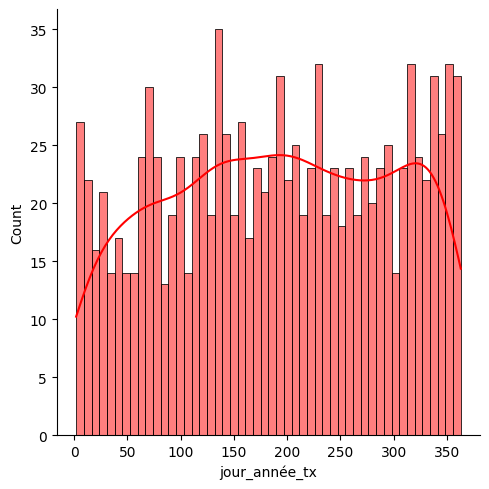

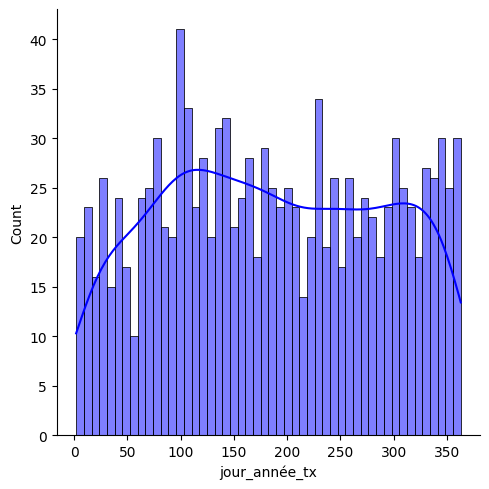

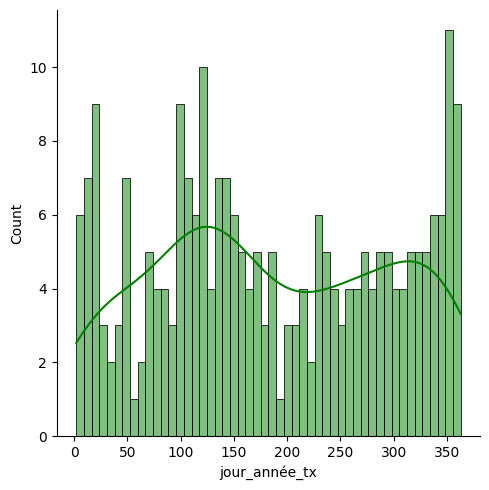

In [37]:
#On regarde dans de manière naïve si le jour de l'année semble avoir un rôle à jouer dans le fait d'être alert ou pas 

sns.displot(df_merge[df_merge['is_alert_solo_A']==1]['jour_année_tx'], kde= True, color='red', bins=50)
sns.displot(df_merge[df_merge['is_alert_solo_B']==1]['jour_année_tx'], kde= True, color='blue', bins=50)
sns.displot(df_merge[df_merge['is_alert_pooled']==1]['jour_année_tx'], kde= True, color='green', bins=50)

##### ==> On observe que de nombreuses tx pooled sont alertées en période de fin d'année Noël et Jour de l'an
==> On peut penser notamment aux cadeaux et aux étrennes

- cela permet de justifier la feature jour de l'année

In [38]:
df_merge.columns

Index(['tx_id', 'tx_amount', 'timestamp', 'tx_type', 'sender_bank_id',
       'sender_first_name', 'sender_last_name', 'sender_country_code',
       'sender_birth_date', 'sender_zip_code', 'receiver_bank_id',
       'receiver_first_name', 'receiver_last_name', 'receiver_country_code',
       'receiver_birth_date', 'receiver_zip_code', 'is_alert_solo_A',
       'nb_tx_sent_A', 'tx_sent_mean_A', 'tx_sent_med_A',
       'nb_tx_sent_alert_solo_A', 'nb_tx_all_A_sender',
       'nb_tx_alert_solo_all_A_sender', 'nb_tx_sent_B', 'tx_sent_mean_B',
       'tx_sent_med_B', 'nb_tx_sent_alert_solo_B', 'nb_tx_all_B_sender',
       'nb_tx_alert_solo_all_B_sender', 'nb_tx_received_A',
       'tx_received_mean_A', 'tx_received_med_A',
       'nb_tx_received_alert_solo_A', 'nb_tx_all_A_receiver',
       'nb_tx_alert_solo_all_A_receiver', 'nb_tx_received_B',
       'tx_received_mean_B', 'tx_received_med_B',
       'nb_tx_received_alert_solo_B', 'nb_tx_all_B_receiver',
       'nb_tx_alert_solo_all_B_receiv